<a href="https://colab.research.google.com/github/typcsk86/Derin-Ogrenme-ile-Duygu-Algilama/blob/main/Tayyip_COSKUN_BitirmeOdevi_2_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VERİSETİNİ GOOGLE DRIVE'DAN COLAB'A YÜKLEMEK**

In [ ]:
zip_adress = "/content/drive/MyDrive/BitirmeOdeviDataset/datasetOriginal.zip"
!cp "{zip_adress}" .

In [ ]:
!unzip -q datasetOriginal.zip
!rm datasetOriginal.zip

**COLAB'A YÜKLEDİĞİMİZ VERİSETİNİ CNN MODELİNE UYGUN HALE GETİRMEK**

In [ ]:
train_dir = "datasetOriginal/train/"
test_dir = "datasetOriginal/test/"

SIZE = 48

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #validation_split = 0.2
                                  )

validation_datagen = ImageDataGenerator(
                                         rescale = 1./255,
                                         validation_split = 0.999
                                       )

In [ ]:
train_generator = train_datagen.flow_from_directory(
                                                      directory = train_dir,
                                                      target_size = (SIZE,SIZE),
                                                      batch_size = 64,
                                                      color_mode = "grayscale",
                                                      class_mode = "categorical",
                                                      subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( 
                                                                directory = test_dir,
                                                                target_size = (SIZE,SIZE),
                                                                batch_size = 64,
                                                                color_mode = "grayscale",
                                                                class_mode = "categorical",
                                                                subset = "validation"
                                                             )

Found 23308 images belonging to 5 classes.
Found 5826 images belonging to 5 classes.


**VERİSETİNİ MODELE VEREREK MODELİ EĞİTMEK**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
model=tf.keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=LeakyReLU(alpha=0.1), input_shape=(48, 48, 1)))

model.add(Conv2D(64, (3,3), padding='same', activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (5,5), padding='same', activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (3,3), padding='same', activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, (5,5), padding='same', activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (5,5), padding='same', activation=LeakyReLU(alpha=0.1)))#, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#model.summary()

In [ ]:
E = 100
history = model.fit(x = train_generator,epochs = E,validation_data = validation_generator)

Epoch 1/100
365/365 [==============================] - 24s 57ms/step - loss: 1.9839 - accuracy: 0.2415 - val_loss: 1.6780 - val_accuracy: 0.3040
Epoch 2/100
365/365 [==============================] - 20s 55ms/step - loss: 1.7977 - accuracy: 0.2743 - val_loss: 1.6124 - val_accuracy: 0.3175
Epoch 3/100
365/365 [==============================] - 20s 54ms/step - loss: 1.7358 - accuracy: 0.2883 - val_loss: 1.5453 - val_accuracy: 0.3465
Epoch 4/100
365/365 [==============================] - 20s 55ms/step - loss: 1.6763 - accuracy: 0.3118 - val_loss: 1.4229 - val_accuracy: 0.4090
Epoch 5/100
365/365 [==============================] - 20s 54ms/step - loss: 1.5900 - accuracy: 0.3492 - val_loss: 2.1761 - val_accuracy: 0.3309
Epoch 6/100
365/365 [==============================] - 20s 55ms/step - loss: 1.4849 - accuracy: 0.3942 - val_loss: 2.4850 - val_accuracy: 0.3387
Epoch 7/100
365/365 [==============================] - 20s 55ms/step - loss: 1.4085 - accuracy: 0.4275 - val_loss: 1.2569 - val_ac

**EĞİTİLMİŞ MODELİN ACC-VAL GRAFİĞİNİ ÇİZDİRMEK**

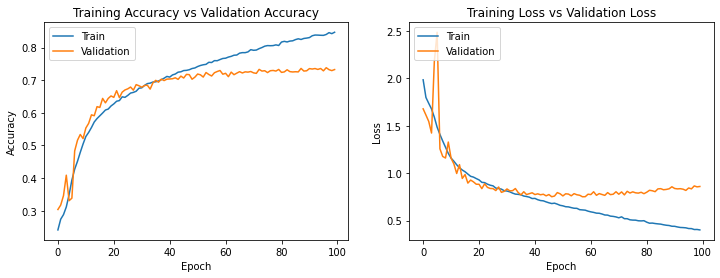

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

**MODELİ TEST ETMEK**

(48, 48)


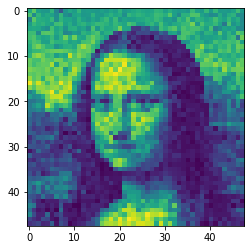

In [ ]:
img = image.load_img("monalisa.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [ ]:
label_dict = {0:'Angry',1:'Fear',2:'Happy',3:'Sad',4:'Surprise'}

In [ ]:
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 0.0, 1.0, 0.0, 0.0]


In [ ]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy
